# <h1 style="font-size: 52px;">FiguraAI</h1>
<div dir="ltr">
איתי אביעד
<br>
בסמת החדש, חיפה
</div>

<img src='images/logo.png' />

<div dir="rtl">
מטרת המחקר היא לעזור לילדים ולאנשים עם בעיות למידה ללמוד צורות שונות על ידי זיהוי צורה שצוירה בכתב יד. 
<br>
המשתמש יצייר צורה באפליקצייה במכשיר הנייד שלו, ויוכל ללמוד על צורות גיאומטריות שונות.
<br><br>
השם FiguraAI הוא שילוב של המילה הלטינית "Figura" שמשמעותה "צורה", והמילה "AI" שמשמעותה "אינטיליגנציה מלאכותית".
</div>

# <h1 dir='rtl' style='text-align: center;' >דאטה סט</h1>

<div dir="rtl">
שם: <strong>Hand-drawn Shapes (HDS) Dataset</strong>
<br>קישור: <u><a href='https://www.kaggle.com/datasets/frobert/handdrawn-shapes-hds-dataset' >https://www.kaggle.com/datasets/frobert/handdrawn-shapes-hds-dataset</a></u>
<br>יוצר: Francois Robert
<br><br>

הדאטה סט כולל תמונות של צורות הכוללות מרובעים, אליפסות ומשולשים, וקבצי <code>csv.</code> עם קודקודי הצורות.
<br><br>
בדאטה סט ישנם 47.3 אלף קבצים (60 MB סך הכל):
<br>
    <ul>
        <li>27.3 אלף קבצי <code>png.</code></li>
        <li>20.0 אלף קבצי <code>csv.</code></li>
    </ul>


<code>png.</code> :
<br>תמונות של צורות שונות המצוירות בכתב יד בסגנונות שונים.
<br><br>
<code>csv.</code> :
<br>כולל קואורדינטות יחסיות של קודקודי הצורות בתמונה מסויימת. קואורדינטות יחסיות הן קואורדינטות של נקודה שהן האחוז מכלל הפיקסלים. הן נעות בין 0 ל 1.
<br>לדוגמה: אם בתמונה יש 70 פיקסלים וערך ה x של קואורדינטה הוא 0.1, כלומר 10%, ערך ה x יהיה בפיקסל ה 7.
<br>כל קובץ csv כולל 4 זוגות של קואורדינטות (x,y) יחסיות. הזוגות מסודרים בכיוון השעון מלמעלה עד שמאלה (למעלה, ימינה, למטה, שמאלה).
<br>

קואורדינטות יחסיות לדוגמה:
</div>

![Relative cordinates example](images/vertices.png)

In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

# <h1 dir='rtl' style='text-align: center;' >חקר נתונים</h1>



### <h3 dir='rtl' style='text-align: center;' >יצירת קובץ CSV חדש וטעינת נתונים</h3>

<p dir='rtl' >בחלק הזה, סידרתי את כל קבצי ה <code>csv.</code> לקובץ <code>csv.</code> אחד משולב.</p>

<div dir='rtl' >
<h4><strong>הערה חשובה:</strong></h4>
בשביל להוריד להריץ את קוד היצירה של קובץ ה <code>csv.</code> החדש (שלושת הבלוקים הבאים), יש להוריד את קבצי הדאטה סט מדף הדאטה סט ב kaggle.com (נמצע בקישור הנ"ל), או להוריד את התיקייה בשם <code>data</code> הנמצאת בספריית ה github של פרוייקט זה.
<br>
הערה: יש למקם את תיקיית ה data באותה התיקייה כמו את קובץ ה <code>ipynb.</code> הזה. 
</div>

In [17]:
directories = [name for name in os.listdir("./data")] # All the subdirectories of the current directory
shapes = ['ellipse', 'rectangle', 'triangle']
print(directories)

['user.aly', 'user.crt', 'user.drt', 'user.elu', 'user.frt', 'user.if1', 'user.if2', 'user.if3', 'user.if5', 'user.if8', 'user.il1', 'user.ilb', 'user.im1', 'user.lrt', 'user.lt1', 'user.lts', 'user.mrt', 'user.nae', 'user.nld', 'user.u01', 'user.u02', 'user.u03', 'user.u04', 'user.u05', 'user.u06', 'user.u07', 'user.u08', 'user.u09', 'user.u10', 'user.u11', 'user.u12', 'user.u13', 'user.u14', 'user.u17', 'user.u18', 'user.u19', 'user.vly']


In [15]:
# Add the columns names to the csv file
with open('cords.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    columns = ['label', 'topX', 'topY', 'rightX', 'rightY', 'bottomX', 'bottomY', 'leftX', 'leftY' ]
    writer.writerow(columns)

In [ ]:
# Combine all the different csv files to the new cords.csv file
with open('cords.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    for folder in directories:
        for shape in shapes:
            labal = shape
            
            if(os.path.exists(f'./data/{folder}/vertices/{shape}')):
                csv_files = os.listdir(f'./data/{folder}/vertices/{shape}')

                for file in csv_files:
                    data = pd.read_csv(f'./data/{folder}/vertices/{shape}/{file}')

                    try:
                        data = pd.DataFrame(np.vstack([data.columns, data])).astype('float')
                        data = np.insert(data.values, 0, shapes.index(shape))

                        writer.writerow(data)
                    except ValueError:
                        continue

### <h3 dir='rtl' style='text-align: center;' >קריאת הנתונים המסודרים</h3>

<div dir='rtl' >
<h4><strong>הערה חשובה:</strong></h4>
כדי להריץ את כל הקוד למטה, צריך להוריד את קובץ ה <code>csv.</code> מספריית ה github של פרוייקט זה הנקרא <code>cords.csv</code>, ולשים אותו באותה התיקייה עם קובץ ה <code>ipynb.</code> הזה.
</div>

In [3]:
cords = pd.read_csv("./cords.csv")
cords.head()

# 0.0 = ellipse
# 1.0 = rectangle
# 2.0 = triangle

,label,topX,topY,rightX,rightY,bottomX,bottomY,leftX,leftY
0,0.0,0.49,0.11,0.60,0.50,0.49,0.88,0.40,0.49
1,0.0,0.49,0.11,0.76,0.49,0.49,0.87,0.22,0.49
2,0.0,0.11,0.52,0.48,0.31,0.89,0.48,0.51,0.69
3,0.0,0.49,0.11,0.66,0.48,0.51,0.88,0.33,0.49
4,0.0,0.50,0.11,0.83,0.49,0.50,0.88,0.17,0.49


In [11]:
# Examples of different shape values
cords[0:201:50]

,label,topX,topY,rightX,rightY,bottomX,bottomY,leftX,leftY
0,0.0,0.49,0.11,0.60,0.50,0.49,0.88,0.40,0.49
50,0.0,0.11,0.54,0.49,0.41,0.88,0.46,0.51,0.59
100,1.0,0.17,0.38,0.80,0.38,0.78,0.62,0.15,0.62
150,2.0,0.23,0.83,0.44,0.08,0.76,0.87,0.23,0.83
200,2.0,0.16,0.35,0.86,0.17,0.55,0.84,0.16,0.35


In [ ]:
cords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    19968 non-null  float64
 1   topX     19968 non-null  float64
 2   topY     19968 non-null  float64
 3   rightX   19968 non-null  float64
 4   rightY   19968 non-null  float64
 5   bottomX  19968 non-null  float64
 6   bottomY  19968 non-null  float64
 7   leftX    19968 non-null  float64
 8   leftY    19968 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
cords.describe()

,label,topX,topY,rightX,rightY,bottomX,bottomY,leftX,leftY
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.00000,19968.000000,19968.000000
mean,1.007212,0.214492,0.598681,0.439140,0.286429,0.773269,0.49797,0.459019,0.684581
std,0.808038,0.121001,0.186111,0.225271,0.131821,0.131793,0.21426,0.258276,0.144045
min,0.000000,0.000000,0.050000,0.010000,0.020000,0.030000,0.05000,0.000000,0.050000
25%,0.000000,0.120000,0.500000,0.230000,0.160000,0.700000,0.35000,0.190000,0.580000
50%,1.000000,0.160000,0.600000,0.470000,0.300000,0.830000,0.49000,0.490000,0.680000
75%,2.000000,0.290000,0.740000,0.560000,0.390000,0.870000,0.65000,0.660000,0.820000
max,2.000000,0.880000,0.990000,0.950000,0.950000,0.990000,0.96000,0.960000,0.990000


In [ ]:
cords['label'].value_counts()

1.0    6930
2.0    6591
0.0    6447
Name: label, dtype: int64

In [ ]:
cords.nunique()

label       3
topX       88
topY       94
rightX     94
rightY     89
bottomX    94
bottomY    91
leftX      95
leftY      94
dtype: int64

### <h3 dir='rtl' style='text-align: center;' >ויזואליזציה של הנתונים</h3>

<div dir='rtl' >
ספירת ערכים ייחודיים לכל קואורדינטה יחסית.
<br>
כל צבע מייצג ערכי x או y שונים.
</div>

Text(0.5, 6.79999999999999, 'Relative coordinate')

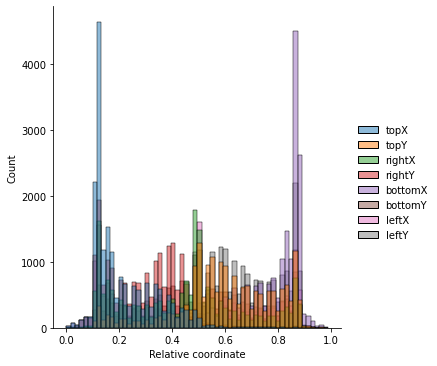

In [5]:
'''
Count of unique values per relative coordinate.
Each color represents different x or y values.
'''

sns.displot(cords.iloc[:, 1:]) # All values, column 1-8
plt.xlabel("Relative coordinate")

<div dir='rtl' >
ספירה של כל סוג צורה שונה בדאטה סט.
</div>

Text(0.5, 6.79999999999999, 'Shape')

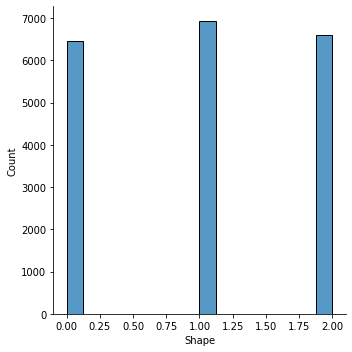

In [8]:
'''
Count of each shape in the dataset.

0.0 = ellipse
1.0 = rectangle
2.0 = triangle
'''

sns.displot(cords.iloc[:, 0]) # All values, column 0
plt.xlabel("Shape")

<div dir='rtl' >
הגרפים מציגים את טווח ערכי ה x או ה y (leftX ו leftY במקרה הזה) לכל צורה.
<br>
המלבן השחור בלמעלה מייצג את טווח הנתנוים בצורה המסויימת, וסוף הבר מייצג את ממוצע הנתונים.
</div>

<AxesSubplot:xlabel='label', ylabel='leftY'>

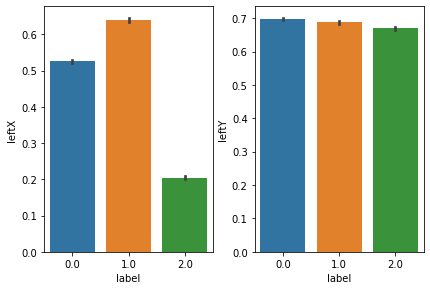

In [27]:
'''
These plots represent the range of x or y values (leftX and leftY in this case) per each shape.
The black rectangle on top represents the range of values of a specific shape,
and the end of the bar represents the mean value.
'''

f, axes = plt.subplots(1, 2)
f.tight_layout() # Spacing between plots
sns.barplot(x=cords['label'], y=cords['leftX'], ax=axes[0])
sns.barplot(x=cords['label'], y=cords['leftY'], ax=axes[1])

<div dir='rtl' >
מייצג ערכי מידע שונים לגבי כל ערכי ה x וה y:
<br>25%, חציון , 75%, מינימום, מקסימום, חריגים
<br>
חריג - נקודת  מידע ששונה באופן משמעותי משאר הנתונים.
</div>

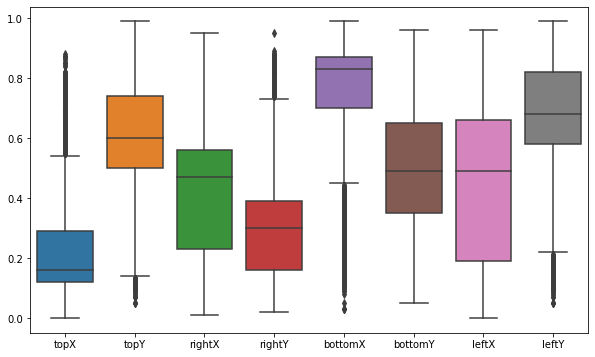

In [ ]:
'''
Represents different information about each x or y value:
25%, 50%, 75%, min, max, outliers
Outlier - A data point that differs significanly from most of the values.
'''

plt.figure(figsize=(10, 6))
sns.boxplot(data=cords.iloc[:, 1:])

<div dir='rtl' >
גרף הפיזור מציג את פריסת הנתונים ביחד לשני נתונים.
<br>
במקרה הזה, כל נקודה מייצגת צורה שונה מהדאטה סט על פי ערכי ה bottomX וה bottomY שלה.
<br>
הגרף מבדיל בין סוגי צורות באמצעות צביעת נקודות המידע בצבעים שונים על פי התג שלהם.
</div>

Text(0, 0.5, 'bottomY')

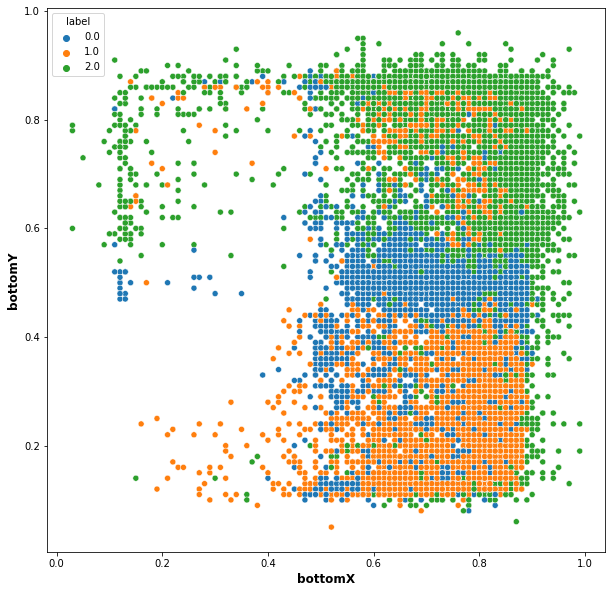

In [31]:
'''
Scatter plot represents the spread of data by 2 values.
In this case, each dot represents a different shape from the dataset by its bottomX and bottomY values.
The plot differentiates data points according to a hue assigned to each label.

0.0 = ellipse = blue
1.0 = rectangle = orange
2.0 = triangle = green
'''

plt.figure(figsize=(10, 10))
sns.scatterplot(x=cords['bottomX'], y=cords['bottomY'], hue=cords['label'], palette=["C0", "C1", "C2"])
plt.xlabel("bottomX", fontsize=12, fontweight='bold')
plt.ylabel("bottomY", fontsize=12, fontweight='bold')

# <h1 dir='rtl' style='text-align: center;' >למידת מכונה</h1>

### <h3 dir='rtl' style='text-align: center;' >חלוקת הנתונים ל train ו test ואימון אלגוריתם KNN</h3>

In [5]:
# Spliting to Lables and Values
X = cords.drop(['label'], axis=1).to_numpy()
y = cords['label'].to_numpy()
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (19968, 8)
y shape: (19968,)


In [6]:
# Spliting to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("train:\n\tX:", X_train.shape, "\n\ty:", y_train.shape)
print("test: \n\tX:" , X_test.shape, "\n\ty:", y_test.shape)

train:
	X: (15974, 8) 
	y: (15974,)
test: 
	X: (3994, 8) 
	y: (3994,)


In [ ]:
# Training the model
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

### <h3 dir='rtl' style='text-align: center;' >בחינת ביצועים</h3>

In [ ]:
# Score test
score = KNN.score(X_test, y_test)
print("score:", score)  

score: 0.9954932398597897


In [ ]:
# Confusion matrix test
y_pred = KNN.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1296,    5,    1],
       [  10, 1456,    0],
       [   0,    2, 1224]])

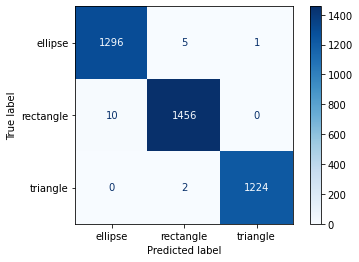

In [ ]:
# Confusion matrix test display
ConfusionMatrixDisplay.from_estimator(KNN, X_test, y_test, values_format="d", cmap='Blues', display_labels=shapes)

In [ ]:
# More scores
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9923    0.9954    0.9939      1302
         1.0     0.9952    0.9932    0.9942      1466
         2.0     0.9992    0.9984    0.9988      1226

    accuracy                         0.9955      3994
   macro avg     0.9956    0.9956    0.9956      3994
weighted avg     0.9955    0.9955    0.9955      3994



# <h1 dir='rtl' style='text-align: center;' >סיכום</h1>

### <h3 dir='rtl' style='text-align: center;' >סיכום העבודה - מסקנות לגבי הנתונים והאלגוריתם</h3>

<div dir='rtl'>
הנתונים:
<br>בהתחלה, הנתונים נראו לא נוחים לעבודה בגלל שהיו מסודרים באלפי קבצי <code dir='ltr' >.csv</code> קטנים לכל אחד מהתמונות, אך לאחר סידור הנתונים בקובץ <code dir='ltr' >.csv</code> חדש, הנתונים התגלו כנוחים לעבודה.
<br><br>
בתוך הדאטה, יש שני סוגי קבצים:
<br>
* בתוך הדאטה סט ישנן אלפי תמנות שחור לבן בגודל קבוע של 70 פיקסלים על 70 פיקסלים (70X70) שבהן מצוירות צורות שונות הכוללות, אליפסות ומעגלים, מרובעים ומלבנים, ומשולשים שונים.
כל התמונות מצוירות בכתב יד בסגנונות שונים, לבן על גבי שחור, כדי שלמודל יהיה יותר קל להתאמן ולזהות את הצורות.
<br>
* בנוסף לכך, בדאטה סט יש אלפי קבצי <code dir='ltr' >.csv</code> שבכל אחד מהם מסודרים 4 זוגות של קואורדינטות המביעות את מיקום הקודקודים באופן יחסי (כלומר האחוז מכלל הפיקסלים בו נמצא הקודקוד) ולכל זוג קואורדינטות יש ערך x וערך y.
<br><br>
האלגוריתם:
<br>
אלגוריתם האימון KNN מספריית sklearn היה נוח לשימוש עם הנתונים שבחרתי, ונתן תוצאות דיוק גבוהות מאוד.
<br>
האלגוריתם מקבל שני dataframes שונים, train ו test. ה dataframes מסודרים על פי labels ונתונים, כאשר הנתונים מביעים את תכונות האיבר שמופיע ב label.
<br>
כמו כן, האלגוריתם מקבל היפר-פרמטר שמסומן על ידי האות k, שמביעה את מספר ה"שכנים" בהם האלגוריתם משתמש כדי לנבע את התוצאה.

</div>

### <h3 dir='rtl' style='text-align: center;' >רפקלציה</h3>

<div dir='rtl' >
תהליך הלמידה היה כיף ולמדתי כמה דברים חדשים.
<br>
ראשית, למדתי כיצד להשתמש בספריות python שונות לסידור ושימוש בנתונים, ספריות ליצירת והצגת גרפים שונים ותוצאות שונות וספריות לחילוק נתונים ואימון מודלים.
<br>
כמו כן, למדתי על אלגוריתם KNN וכיצד להשתמש בו לאימון מודל למידת מכונה, וכיצד לבדוק את אמינותו ודיוקו.
<br>
למדתי על נוסחאות שונות לבדיקת דיוק המודל כמו socre, precision, recall ו f1, בנוסף לטבלת דיוק ניבוי האלגוריתם  confusion matrix.
<br><br>
Precision - הסיכוי שהניבוי נכון מכלל הניבויים החיוביים.
<br>
Recall - החלק מהחיוביים האמיתיים שזוהו נכון.
<br>
F1 - הממוצע ההרמוני של precision ו recall. ממוצע הרמוני הוא הממוצע ההופכי של ההופכיים.
<br>
הסברים על ה scores:
</div>

![classification_table](images/classification_table.png)
<br>
![F1](images/F1.png)
![scores](images/scores.png)